# Case Study - Credit Card Payment


In this case study, we will apply various classification algorithms to predict the payment for credit card for next month is defaulted or not.

---

##### Scenario:

Ascension multinational bank offers a wide range of financial services including credit card service.

##### Challenge:

The bank is facing issues in tracking the regular payment of credit card thereby leading to increase in the involvement of their assets. We, as a Data Scientist have to create a model to predict the customers who will default for the next month.

##### Dataset:


The company has information on 15000 customers. The dataset contains information on 25 variables, including demographic factors, credit data, history of payment, and bill statements of credit card customers from April 2005 to September 2005 and the information whether the customer will default payment for the next month or not?
The description of the columns is as given below:

- __ID__: ID of each customer
- __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- __SEX__: Gender (1=male, 2=female)
- __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- __MARRIAGE__: Marital status (1=married, 2=single, 3=others)
- __AGE__: Age in years
- __PAY_0__: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- __PAY_2__: Repayment status in August, 2005 (scale same as above)
- __PAY_3__: Repayment status in July, 2005 (scale same as above)
- __PAY_4__: Repayment status in June, 2005 (scale same as above)
- __PAY_5__: Repayment status in May, 2005 (scale same as above)
- __PAY_6__: Repayment status in April, 2005 (scale same as above)
- __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)
- __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)
- __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)
- __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)
- __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)
- __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)
- __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)
- __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)
- __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)
- __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)
- __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)
- __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)
- __default.payment.next.month__: Default payment (1=yes, 0=no)

- ### Load Required Libraries

In [ ]:
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to ignore warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

- ### Load and analyse data

        - Load the data from the required location into a DataFrame
        - Analyse the shape of the data by printing its total number of rows & columns
        - Also print 5 rows of the DataFrame

In [5]:
credit = pd.read_csv("UCI_Credit_Card.csv")

In [6]:
credit.shape

(15000, 25)

In [7]:
credit.head() ### Glimpse of the data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
3,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
4,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


- ### Clean the data


    - ID variable as it has no relevance to training a model
    - Check for any null values


In [8]:
# Removing ID variable as it has no relevnce for logistic regression model
credit.drop(['ID'],axis=1, inplace=True)

In [9]:
# Checking for any null values
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no null values in the data set

- ### Check Description 
       
       - 7 point statistics for the continous features

In [10]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.00000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,169527.578667,1.603933,1.855933,1.545200,35.508467,-0.030867,-0.138800,-0.176933,-0.229200,-0.273067,...,43118.445933,40351.464000,38825.088667,5780.55660,6.127210e+03,5307.791000,4965.934067,4903.425000,5266.527867,0.218867
std,130648.638294,0.489095,0.791467,0.520745,9.197418,1.122912,1.202954,1.197438,1.169141,1.127558,...,64329.094075,61109.614828,60034.459443,16549.96775,2.227448e+04,17651.918097,16584.273453,15621.695352,17953.612040,0.413492
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-209051.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2303.000000,1759.000000,1248.000000,971.75000,8.352500e+02,392.000000,299.000000,266.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18944.000000,17934.000000,16587.000000,2100.00000,2.010000e+03,1823.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53963.250000,49944.000000,48739.750000,5020.25000,5.000000e+03,4500.000000,4040.000000,4077.500000,4100.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,497000.000000,426529.000000,527143.000000,1.000000


 - We know that many of the variable are categorical variabble

- ### Check either the data is balanced or not

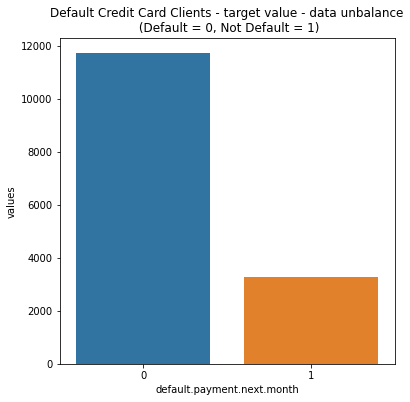

In [11]:
## Checking for data unbalance
temp = credit["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Around 22% of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

- ### Correlation for only numeric variable

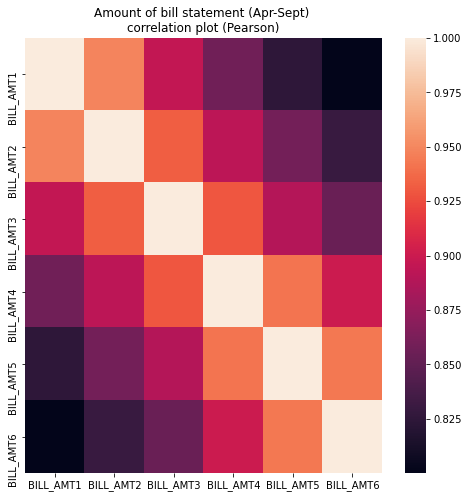

In [12]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = credit[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()


Correlation seems fine for the variable

- ### Treatment of categorical features

Treating the categorical features to introduce into the model

In [13]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [14]:
credit_dummies = pd.get_dummies(credit, columns = cat_features)

In [15]:
print("Default of Credit Card Clients train data -  rows:",credit_dummies.shape[0]," columns:", credit_dummies.shape[1])

Default of Credit Card Clients train data -  rows: 15000  columns: 90


In [16]:
target= 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'SEX_1',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7']

- ### Divide target and features

In [17]:
#Assigning and dividing the dataset
X = credit_dummies[predictors]
y=credit_dummies['default.payment.next.month']

- ### Create training and testing set

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [19]:
X_train.shape

(12000, 80)

In [20]:
X_test.shape

(3000, 80)

- ### Apply Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [22]:
#### Predicting on X_test dataset
y_pred = classifier.predict(X_test)

- #### Assessing Model performance
    - __Precision__: Percentage of correct results
    - __Recall__: Percentage of valid results correctly classified
    - __F1 Score__: A measure of test's accuracy which is harmonic mean of precision and recall. Maximising this improves the model. Perfect at 1 and worst at 0. 

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.780333        0.0     0.0       0.0


/home/affine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
confusion_matrix(y_test,y_pred)

array([[2341,    0],
       [ 659,    0]])

- ### Apply SMOTE as data is unbalanced

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))

18752


In [27]:
classifier1 = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier1.fit(X_SMOTE, y_SMOTE)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [28]:
#### Predicting on X_test dataset
y_pred1 = classifier1.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression - with SMOTE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961


In [30]:
confusion_matrix(y_test,y_pred1)

array([[1208, 1133],
       [ 187,  472]])

Accuracy has dipped but F1 score of the model has improved

- ### Apply Decison Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(X_train, y_train)
# do our predictions on the test
pred_dt = clf.predict(X_test)

In [33]:
# Predicting Test Set
acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt)
rec = recall_score(y_test, pred_dt)
f1 = f1_score(y_test, pred_dt)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982


- ### Apply Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786
4            Random Forest(Entropy)  0.817333   0.646438  0.371775  0.472062


- ### Top 5 Features

> Decision Tree

In [36]:
result = pd.DataFrame({'features':X_train.columns,'score':clf.feature_importances_.tolist()})
result.sort_values(by=['score'],ascending=False).head()

,features,score
26,PAY_0_2,0.126742
1,AGE,0.079002
0,LIMIT_BAL,0.065819
9,PAY_AMT3,0.065632
2,BILL_AMT1,0.063604


> Random Forest

In [37]:
result_rf = pd.DataFrame({'features':X_train.columns,'score':clf_rf.feature_importances_.tolist()})
result_rf.sort_values(by=['score'],ascending=False).head()

,features,score
0,LIMIT_BAL,0.069526
1,AGE,0.068742
2,BILL_AMT1,0.065376
3,BILL_AMT2,0.059573
5,BILL_AMT4,0.057756


Difference in feature importance provided by random forest classfier vs Decision tree.

- ### Apply SVM

In [38]:
from sklearn.svm import SVC

In [39]:
model_svm = SVC(cache_size=100)

In [40]:
model_svm.fit(X_train,y_train)

SVC(cache_size=100)

The model takes lot of time to run.  Hence caution before you run it

In [41]:
# Predicting Test Set
predicted= model_svm.predict(X_test)

In [42]:
acc = accuracy_score(y_test, predicted)
prec = precision_score(y_test, predicted,zero_division=True)
rec = recall_score(y_test, predicted,zero_division=True)
f1 = f1_score(y_test, predicted,zero_division=True)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786
4            Random Forest(Entropy)  0.817333   0.646438  0.371775  0.472062
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000


- ### Apply KNN with N = 3

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model_knn3 = KNeighborsClassifier(n_neighbors=3)
model_knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

- ### Apply KNN with N = 4

In [45]:
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

- ### Apply KNN with N = 5

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model_knn5 = KNeighborsClassifier(n_neighbors=5)
model_knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(X_test)
acc = accuracy_score(y_test, pred_knn3)
prec = precision_score(y_test, pred_knn3)
rec = recall_score(y_test, pred_knn3)
f1 = f1_score(y_test, pred_knn3)

model_results = pd.DataFrame([['KNN-3 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=4
pred_knn4= model_knn4.predict(X_test)
acc = accuracy_score(y_test, pred_knn4)
prec = precision_score(y_test, pred_knn4)
rec = recall_score(y_test, pred_knn4)
f1 = f1_score(y_test, pred_knn4)

model_results = pd.DataFrame([['KNN-4 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=5
pred_knn5= model_knn5.predict(X_test)
acc = accuracy_score(y_test, pred_knn5)
prec = precision_score(y_test, pred_knn5)
rec = recall_score(y_test, pred_knn5)
f1 = f1_score(y_test, pred_knn5)

model_results = pd.DataFrame([['KNN-5 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786
4            Random Forest(Entropy)  0.817333   0.646438  0.371775  0.472062
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                   KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                   KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                   KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167


- ### Apply Naive Bayes

In this case, it is possible to apply gaussian and bernoulli naive bayes.

- ### Apply Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
# Predicting Test Set
pred_gnb = gnb.predict(X_test)
acc = accuracy_score(y_test, pred_gnb)
prec = precision_score(y_test, pred_gnb)
rec = recall_score(y_test, pred_gnb)
f1 = f1_score(y_test, pred_gnb)

model_results = pd.DataFrame([['Gaussian Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.780333   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786
4            Random Forest(Entropy)  0.817333   0.646438  0.371775  0.472062
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                   KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                   KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                   KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167
9              Gaussian Naive Bayes  0.356333   0.245600  0.931715  0.388731


- ### Apply Bernoulli Naive Bayes

In [52]:
from sklearn.naive_bayes import BernoulliNB

In [53]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train, y_train)

BernoulliNB()

In [54]:
# Predicting Test Set
pred_bnb = model_bnb.predict(X_test)
acc = accuracy_score(y_test, pred_bnb)
prec = precision_score(y_test, pred_bnb)
rec = recall_score(y_test, pred_bnb)
f1 = f1_score(y_test, pred_bnb)

model_results = pd.DataFrame([['Bernoulli Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                               Model  Accuracy  Precision    Recall  F1 Score
0                Logistic Regression  0.780333   0.000000  0.000000  0.000000
1   Logistic Regression - with SMOTE  0.560000   0.294081  0.716237  0.416961
2                      Decision Tree  0.727000   0.383721  0.400607  0.391982
3                Random Forest(Gini)  0.819333   0.657682  0.370258  0.473786
4             Random Forest(Entropy)  0.817333   0.646438  0.371775  0.472062
5             Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                    KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                    KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                    KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167
9               Gaussian Naive Bayes  0.356333   0.245600  0.931715  0.388731
10             Bernoulli Naive Bayes  0.788333   0.519672  0.481032  0.499606


- ### Which model fits the best?

- #### Check Best Accuracy

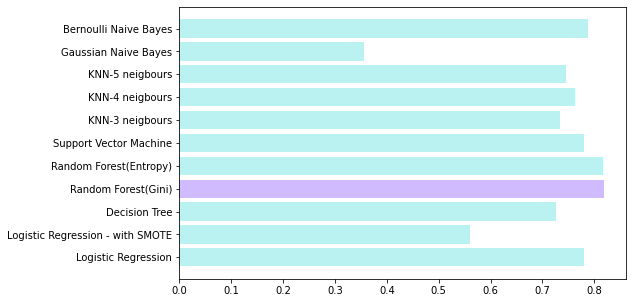

In [55]:
plt.figure(figsize=(8,5))
max_acc_index=results.Accuracy[results.Accuracy==results.Accuracy.max()].index[0]
plt.barh(results.Model,results.Accuracy,color='c')
plt.barh(results.Model[max_acc_index],results.Accuracy[max_acc_index],color='m')
plt.show()

- #### Check Best Precision

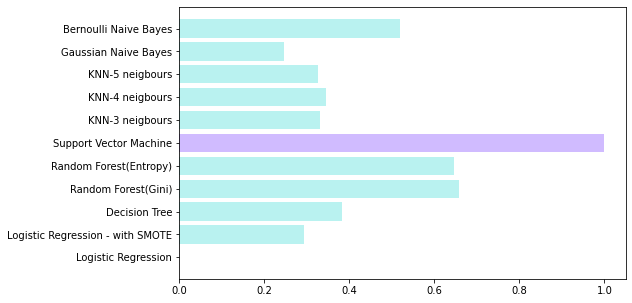

In [56]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

- #### Check Best Recall

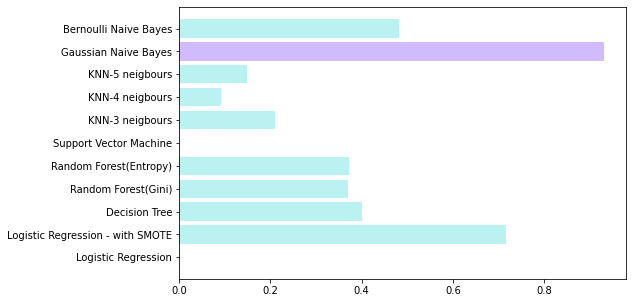

In [57]:
plt.figure(figsize=(8,5))
max_rc_index=results.Recall[results.Recall==results.Recall.max()].index[0]
plt.barh(results.Model,results.Recall,color='c')
plt.barh(results.Model[max_rc_index],results.Recall[max_rc_index],color='m')
plt.show()

- #### Best F1-Score

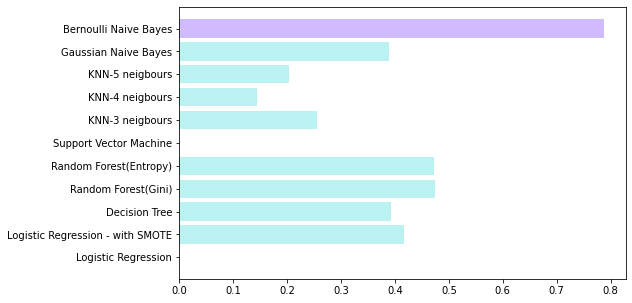

In [58]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()

Based on accuracy Random Forest(Gini) is the best model. On considering other parameters of the model it is performing well.

<b><i>Conclusion</i></b>: In this demonstration of the case study, we have gained an understanding of how to apply various data pre-processing steps, apply SMOTE and different classification algorithms.